# Predicting heart disease using Machine Learning approach

**Focus** - To build a machine learning model that will predict with maximum accuracy whether or not an individual is suffering from a heart disease based on some medical data.

Data has been obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease)
It is also available at [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).

**Importing the tools we will need for `exploratory data analysis`**


In [1]:
# importing the standard libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models from sci-kit learn for machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# for model evaluations

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

**Loading the data**

In [2]:
hd = pd.read_csv("https://raw.githubusercontent.com/ineelhere/Machine-Learning-and-Data-Science/master/Milestone%20Project%201/data/heart-disease.csv")
hd #just to check if the data has been properly imported

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Exploring the imported data**

In [3]:
#first 5 rows of the dataset
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#last 5 rows of the dataset
hd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# shape (rows,columns) of the dataset
hd.shape

(303, 14)

In [6]:
# description of data in the dataset
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# data information
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
# number of classes in particular column - counting the values
hd.target.value_counts()

1    165
0    138
Name: target, dtype: int64

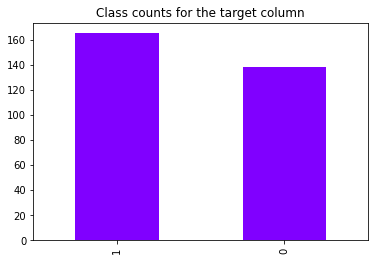

In [9]:
# visualizing the above
hd.target.value_counts().plot.bar(colormap='rainbow', title='Class counts for the target column');

In [10]:
# inspecting missing values
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# so no missing values above! 

# now comparing sex column with target column
pd.crosstab(hd.target, hd.sex)

sex,0,1
target,,
0,24,114
1,72,93


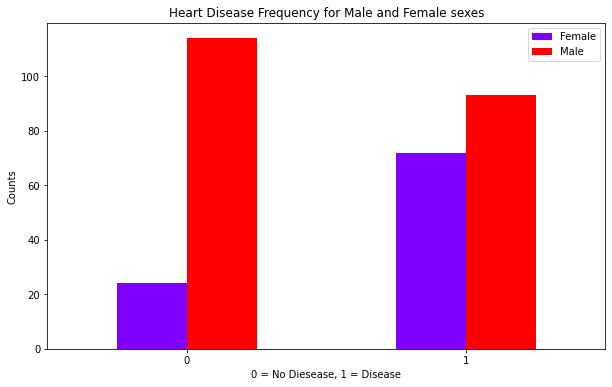

In [12]:
# visualizing the above output (the crosstab)
# Create a plot of crosstab
pd.crosstab(hd.target, hd.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    colormap = 'rainbow')

plt.title("Heart Disease Frequency for Male and Female sexes")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Counts")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

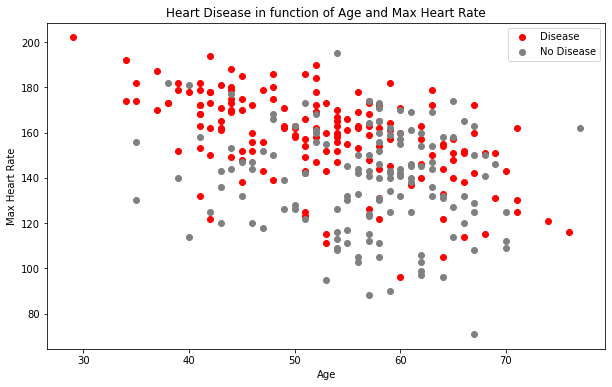

In [13]:
# age distribution for heart disease 


plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(hd.age[hd.target==1],
            hd.thalach[hd.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(hd.age[hd.target==0],
            hd.thalach[hd.target==0],
            c="grey")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

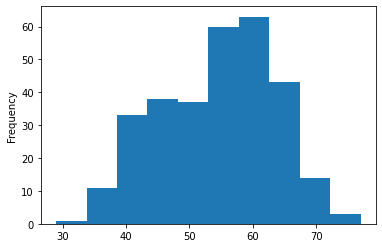

In [14]:
# age distribution in a histogram
hd.age.plot.hist();

# Heart Disease Frequency per Chest Pain (cp) Type
The dataset source (UCI) describes the cp values as follows -
* 0 - Typical angina: chest pain related decrease blood supply to the heart
* 1 - Atypical angina: chest pain not related to heart
* 2 - Non-anginal pain: typically esophageal spasms (non heart related)
* 3 - Asymptomatic: chest pain not showing signs of disease

In [15]:
# looking at the dataset again - for in data, we trust
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# just figuring out how "target" is distributed with the "cp"
pd.crosstab(hd.cp, hd.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


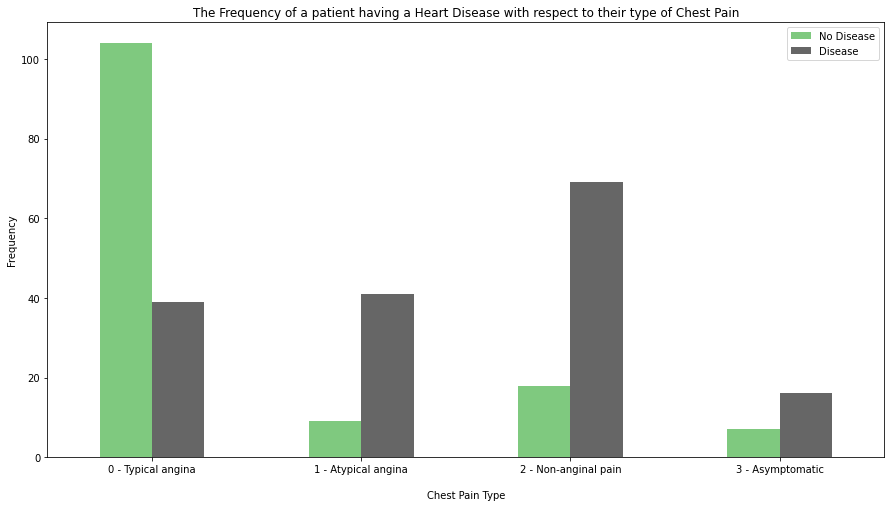

In [17]:
# Visualization of the above data will be more helpful
fig = pd.crosstab(hd.cp, hd.target).plot(kind="bar",
                                   figsize=(15, 8),
                                   colormap = "Accent")

plt.title("The Frequency of a patient having a Heart Disease with respect to their type of Chest Pain")
plt.xlabel("\nChest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
a=fig.get_xticks().tolist()
a[0]='0 - Typical angina'
a[1]='1 - Atypical angina'
a[2]='2 - Non-anginal pain'
a[3]='3 - Asymptomatic'
fig.set_xticklabels(a)
plt.xticks(rotation=0);

In [18]:
# Correlation matrix to analyze the dataset better
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


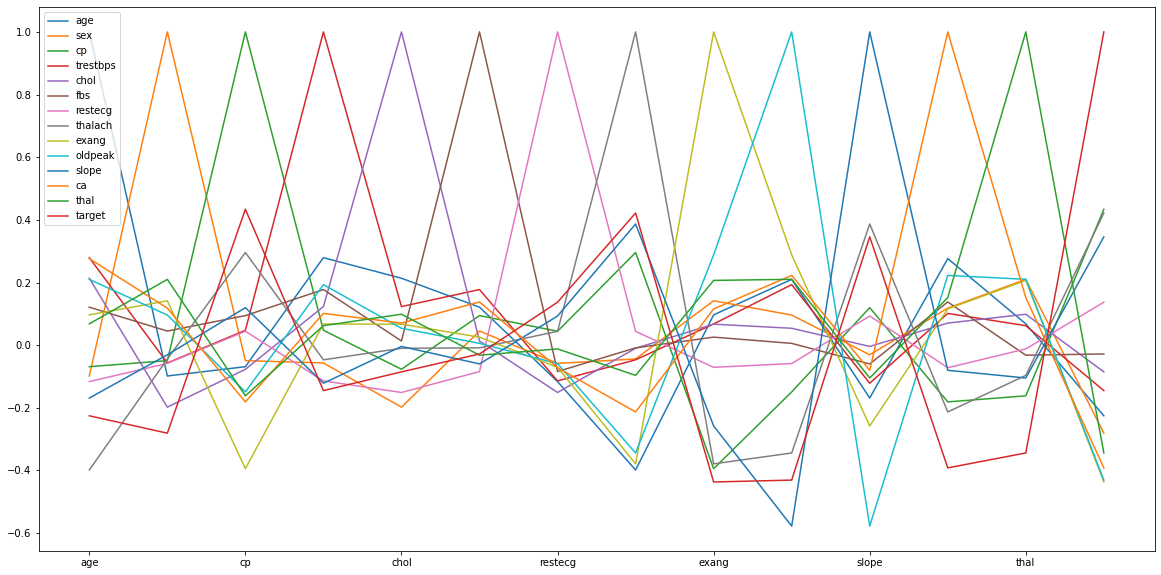

In [19]:
# but it looks better with a plot
hd.corr().plot(figsize=(20,10))

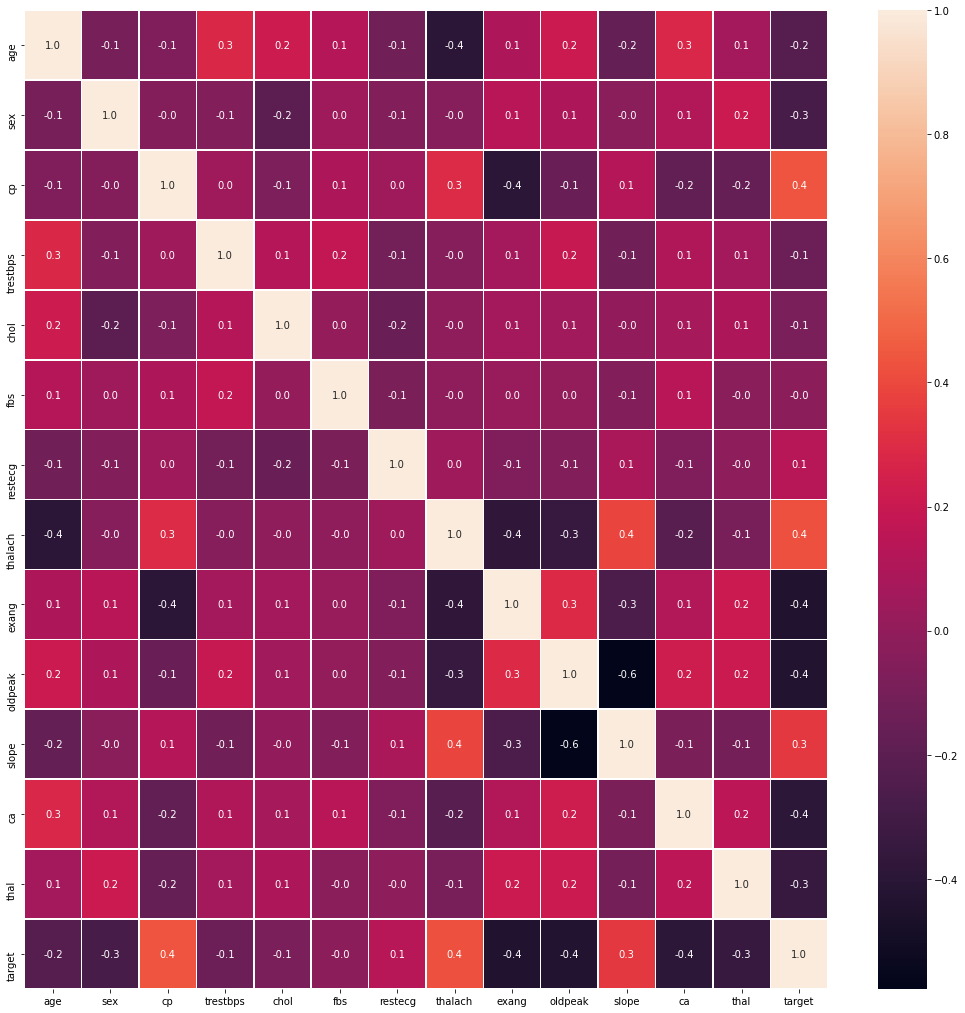

In [20]:
# no, the above plot looks complicated.
# here is a heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(hd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**Modelling the data**

In [21]:
# Spliting the data
x = hd.drop("target", axis=1)
y = hd["target"]

In [22]:
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [23]:
np.random.seed(42)

# creating the training and test sets from x and y
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [24]:
x_train, x_test, y_train, y_test

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

In [25]:
# creating a dictionary containing all the models

models = {"LogisticRegression score": LogisticRegression(),
          "KNeighborsClassifier score": KNeighborsClassifier(),
          "RandomForestClassifier score ": RandomForestClassifier()}

In [26]:
# Creating a function to fit and score models - saves a lot of time spent on writing codes

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\neel\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression score': 0.8852459016393442,
 'KNeighborsClassifier score': 0.6885245901639344,
 'RandomForestClassifier score ': 0.8360655737704918}

**Comparing the above model scores**


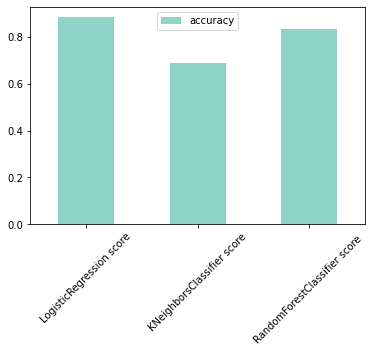

In [28]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(colormap="Set3");
plt.xticks(rotation=45);

So, the baseline model is ready. Now it is time to improve these scores
<br>**Tuning the hyperparameters**

In [29]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [30]:
# moment of truth

train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum KNN score on the test data: 75.41%


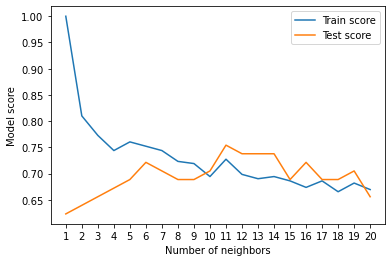

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**Tuning hyperparameters using RandomizedSearchCV**
 - Using LogisticRegression() 

In [32]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [33]:
# so the best hyperparameters were -
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
# and the best score -
rs_log_reg.score(x_test, y_test)

0.8852459016393442

**Tuning hyperparameters using RandomizedSearchCV**
 - Using RandomForestClassifier()

In [35]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [36]:
# So the best hyperparameters are
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
# So the best score is 
rs_rf.score(x_test, y_test)

0.8688524590163934

**Tuning hyperparameters using GridSearchCV**
 <br>Just to see if the above score could be improved further using LogisticRegression() itself

In [38]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model

gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


In [39]:
# So the best hyperparameters are
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
# and the best score
gs_log_reg.score(x_test, y_test)

0.8852459016393442

The score improved!!

## Evaluting our tuned machine learning classifier, beyond accuracy - using...

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [41]:
# first things first - making predictions with the tuned model
y_preds = gs_log_reg.predict(x_test)

In [42]:
y_preds, y_test

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64)

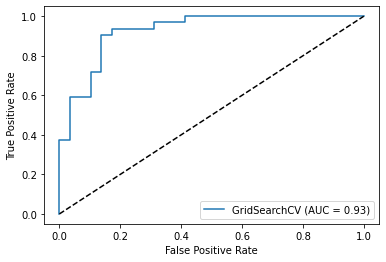

In [43]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test)

#plot the baseline (line with no predictive power)
plt.plot([0,1],[0,1], color="black", linestyle="--")

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm 

array([[25,  4],
       [ 3, 29]], dtype=int64)

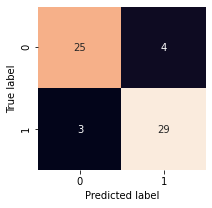

In [45]:
# let's visualize the confusion matrix

def plot_cm(cm):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(cm,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_cm(cm)

In [46]:
# classification report for precision, recall, f1-score and support

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Calculate evaluation metrics using cross-validation**

In [47]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [49]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [50]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [51]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [52]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [53]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

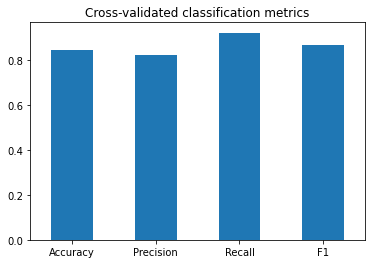

In [54]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);
plt.xticks(rotation=0);

**Now that so many analyses have been done, it is time to find out <br> `which features contributed most to the outcomes of the model and how did they contribute` - FEATURE IMPORTANCE**

In [55]:
# quick view of the dataset
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);

In [57]:
# Check coef_ (coefficients for the prediction)
clf.coef_

array([[ 0.00316728, -0.86044649,  0.66067041, -0.01156993, -0.00166374,
         0.04386108,  0.31275845,  0.02459361, -0.60413079, -0.56862805,
         0.45051627, -0.63609896, -0.67663372]])

In [58]:
# Matching coef's of features to columns

feature_dict = dict(zip(hd.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672799501859627,
 'sex': -0.8604464852464384,
 'cp': 0.6606704146060298,
 'trestbps': -0.01156993166388755,
 'chol': -0.001663744419960415,
 'fbs': 0.04386107685747963,
 'restecg': 0.3127584515235279,
 'thalach': 0.024593613562863888,
 'exang': -0.6041307872269133,
 'oldpeak': -0.5686280479356108,
 'slope': 0.45051627405106476,
 'ca': -0.6360989586633043,
 'thal': -0.6766337229536633}

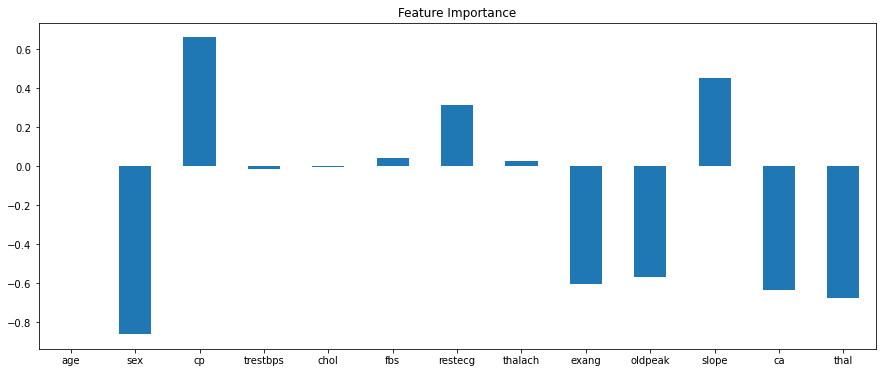

In [59]:
# Visualizing feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize = (15,6));
plt.xticks(rotation=0);

## Next possibilities...
* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we improve the current models? (beyond what we've done so far)
* If our model is good enough (we have hit your evaluation metric) how would we export it and share it with others?

# References -

* [Complete Machine Learning and Data Science: Zero to Mastery | Taught by Andrei Neagoie & Daniel Bourke](https://academy.zerotomastery.io/p/complete-machine-learning-and-data-science-bootcamp-zero-to-mastery)
* [Data ScienceTutorial for Beginners from Kaggle](https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners)
* [Python for Data Analysis, 2nd Edition - Book](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition - Book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
* [Machine Learning Crash Course with TensorFlow APIs | Google's fast-paced, practical introduction to machine learning](https://developers.google.com/machine-learning/crash-course)
* [Data Science Course at Sololearn](https://www.sololearn.com/Course/data-science/) 
* [Machine Learning Course at Sololearn](https://www.sololearn.com/Course/machine-learning/)

This short project has been a learning endeavour with the help of the above learning resources. It is just a small step towards entering the world of `Data Science and Machine Learning` and beyond. Collaboration is always welcome. In case you find any mistake(s) in the codes, please let me know.

**Best wishes and thank you, <br>
[Indraneel Chakraborty](https://ineelhere.github.io/)**

![](https://media1.tenor.com/images/ba12a2d7c6295364b08670fa0e2cdd55/tenor.gif?itemid=11879428)
 